 - 爬台灣紡織業股票的漲跌價差

In [5]:
import requests
import json
from time import sleep
import numpy as np

In [3]:
stockNo = [1409,1410,1477]
ans = dict()
decoder = json.JSONDecoder()
for no in stockNo:
    for i in range(12):
        print(no, i)
        if i+1 < 10:
            url = 'http://www.tse.com.tw/exchangeReport/STOCK_DAY?date=20170'+str(i+1)+'01&stockNo='+str(no)
        else:
            url = 'http://www.tse.com.tw/exchangeReport/STOCK_DAY?date=2017'+str(i+1)+'01&stockNo='+str(no)
        res = requests.get(url)        
        stock = decoder.decode(res.text)
        date = [stock["data"][i][0] for i in range(len(stock["data"]))]
        value = [stock["data"][i][-2] for i in range(len(stock["data"]))]
        if str(no) in ans:
            ans[str(no)]['date'].append(date)
            ans[str(no)]['value'].append(value)
        else:
            ans[str(no)] = dict()
            ans[str(no)]['date'] = list()
            ans[str(no)]['value'] = list()
            ans[str(no)]['date'].append(date)
            ans[str(no)]['value'].append(value)
        sleep(5)

1409 0
1409 1
1409 2
1409 3
1409 4
1409 5
1409 6
1409 7
1409 8
1409 9
1409 10
1409 11
1410 0
1410 1
1410 2
1410 3
1410 4
1410 5
1410 6
1410 7
1410 8
1410 9
1410 10
1410 11
1477 0
1477 1
1477 2
1477 3
1477 4
1477 5
1477 6
1477 7
1477 8
1477 9
1477 10
1477 11


In [30]:
ans['1410']['value']=np.array(ans['1410']['value'])

In [34]:
ans['1410']['value'].astype('float32')

ValueError: setting an array element with a sequence.

In [45]:
ans['1477']['value']

array([array([ 4. , -0.5, -2. , -3. , -2. ,  2. ,  0. ,  1. , -2.5,  0. ,  1. ,
       -1. , -3.5, -0.5,  0. , -1. ], dtype=float32),
       array([-3.5,  3. , -1.5,  1.5,  0.5,  0.5,  1. , -2. ,  0. ,  0. , -1.5,
        3. ,  5.5,  0.5, -2. ,  1.5,  0.5,  1.5], dtype=float32),
       array([ 0. , -1. , -0.5, -2.5,  3. ,  0. ,  0.5,  2. ,  2. ,  0.5, -0.5,
       -1. ,  4. , -0.5, -1.5, -1.5,  2.5,  0.5, -3. , -2.5, -0.5,  0.5,
       -0.5], dtype=float32),
       array([ 0.5, -2. ,  0.5,  1. , -2. , -1.5,  0.5, -1.5,  1.5,  1.5, -2. ,
        1. ,  1.5, -1.5, -0.5,  0.5,  0.5,  4.5], dtype=float32),
       array([ 4.5, -1.5,  0.5, -3. , -1.5, -1.5,  2. ,  0. ,  2.5,  1.5,  9. ,
        1. , -3. , -0.5, -0.5,  1. , -1. ,  1. , -1.5, -1. ],
      dtype=float32),
       array([ 1.5,  2.5, -1.5, -2. ,  2. , -2. ,  3. ,  0.5, -1. ,  4. , -5. ,
        0.5,  2. ,  0.5,  0.5, -1. ,  5.5,  1. ,  2.5, -1.5, -1. ,  0. ,
        1. ], dtype=float32),
       list(['+3.00', '-1.00', '-2.00', '-1.

In [47]:
ans['1477']['value'][6][10] = 0.00

- 將3個股票每個月的漲幅相加

In [48]:
for no in stockNo:
    ans[str(no)]['value']=np.array(ans[str(no)]['value'])
    for i in range(len(ans[str(no)]['value'])):
        ans[str(no)]['value'][i] = np.array(ans[str(no)]['value'][i]).astype('float32')

In [49]:
YO = []
for i in range(len(ans['1477']['value'])):
    fm = np.sum(ans['1477']['value'][i] + ans['1409']['value'][i] + ans['1410']['value'][i])
    YO.append(fm)

In [50]:
YO

[-5.8399997,
 9.19,
 -0.61999965,
 0.8800001,
 7.590001,
 12.15,
 -5.3799996,
 8.04,
 -10.540001,
 8.33,
 -19.210001,
 4.29]

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
import pandas as pd
df = pd.read_csv('Ntu_Orders.csv')
df.shape
df.info()
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
df['Quantity'].head()
#df.loc[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268348 entries, 0 to 2268347
Data columns (total 27 columns):
SalesOrderSlaveId              int64
DateId                         int64
MemberId                       object
TradesOrderSlaveId             int64
ShopId                         int64
SalePageId                     int64
TradesOrderGroupCode           object
TrackSourceTypeDef             object
TrackChannelTypeDef            object
TrackDeviceTypeDef             object
LevelOneCategoryName           object
LevelTwoCategoryName           object
LevelThreeCategoryName         object
LevelFourCategoryName          object
IsMajor                        bool
IsGift                         bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
EcouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderSlaveStatusDef       object
PayProfileTypeDef  

0    1
1    1
2    1
3    1
4    1
Name: Quantity, dtype: int64

In [53]:
ga = pd.DataFrame(df.groupby(by='new_DateId')['Quantity'].sum())
ga

,Quantity
new_DateId,
2017-01-01,3823
2017-01-02,5105
2017-01-03,3623
2017-01-04,2889
2017-01-05,2843
2017-01-06,2391
2017-01-07,2641
2017-01-08,2335
2017-01-09,2119


 - 計算每個月的天數

In [54]:
g =[]
import calendar as cd
ii = cd.mdays
ii

[0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [55]:
bb = 0
for ij in range(len(ii)):
    bb = bb+ii[ij]
    g.append(bb)

In [56]:
ga_size = len(ga)
g.append(ga_size)
print(g)

[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365, 374]


- 算出每月的銷貨量

In [57]:
gh = []
for ij in range(len(g)-1):
    gm = ga[g[ij]:(g[ij+1]-1)].sum()
    print(gm)
    gh.append(int(gm))    

Quantity    65290
dtype: int64
Quantity    97491
dtype: int64
Quantity    196562
dtype: int64
Quantity    259715
dtype: int64
Quantity    256074
dtype: int64
Quantity    200846
dtype: int64
Quantity    195764
dtype: int64
Quantity    148498
dtype: int64
Quantity    130954
dtype: int64
Quantity    172558
dtype: int64
Quantity    261764
dtype: int64
Quantity    205183
dtype: int64
Quantity    45220
dtype: int64


In [58]:
gh

[65290,
 97491,
 196562,
 259715,
 256074,
 200846,
 195764,
 148498,
 130954,
 172558,
 261764,
 205183,
 45220]

In [59]:
# 僅看2017年每月的銷貨量
gg = ['65290','97491','196562','259715',
 '256074','200846','195764','148498','130954',
 '172558','261764','205183']

In [60]:
date = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [61]:
pd.DataFrame(np.transpose(np.vstack([date, gg])))

,0,1
0,Jan,65290
1,Feb,97491
2,Mar,196562
3,Apr,259715
4,May,256074
5,Jun,200846
6,Jul,195764
7,Aug,148498
8,Sep,130954
9,Oct,172558


In [62]:
ag = pd.DataFrame(np.transpose(np.vstack([date, gg ,YO])))
type(ag)

pandas.core.frame.DataFrame

In [63]:
ag

,0,1,2
0,Jan,65290,-5.8399997
1,Feb,97491,9.19
2,Mar,196562,-0.61999965
3,Apr,259715,0.8800001
4,May,256074,7.590001
5,Jun,200846,12.15
6,Jul,195764,-5.3799996
7,Aug,148498,8.04
8,Sep,130954,-10.540001
9,Oct,172558,8.33


In [70]:
ag[0]

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: 0, dtype: object

In [71]:
ag_list = list(ag[0])

In [72]:
ag_list

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

 - Bule Line 為購買量  ;  Orange Line為股票漲幅
 - 所以可以看出股票的漲幅與購買力無太大關係

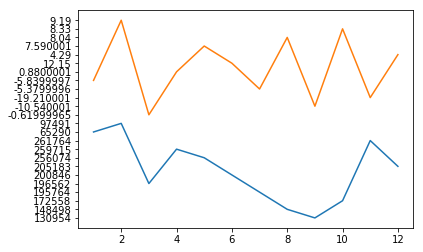

In [80]:
plt.plot(np.arange(len(ag[1]))+1,ag[1])
plt.plot(np.arange(len(ag[1]))+1,ag[2])
plt.show()